SIN-392 - Introdução ao Processamento Digital de Imagens (2022-1)

# Aula 06 - Filtragem espacial - Convolução

Prof. João Fernando Mari

-----

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-as-bibliotecas-necessárias" data-toc-modified-id="Importando-as-bibliotecas-necessárias-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando as bibliotecas necessárias</a></span></li><li><span><a href="#Criando-uma-imagem-simples" data-toc-modified-id="Criando-uma-imagem-simples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Criando uma imagem simples</a></span></li><li><span><a href="#Criando-uma-máscara-convolução" data-toc-modified-id="Criando-uma-máscara-convolução-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Criando uma máscara convolução</a></span></li><li><span><a href="#Convolução-com-padding-=-0" data-toc-modified-id="Convolução-com-padding-=-0-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Convolução com padding = 0</a></span></li><li><span><a href="#Convolução-com-padding-refletido" data-toc-modified-id="Convolução-com-padding-refletido-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Convolução com padding refletido</a></span></li><li><span><a href="#Carregando-uma-imagem" data-toc-modified-id="Carregando-uma-imagem-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Carregando uma imagem</a></span></li><li><span><a href="#Filtragem-espacial-por-convolução" data-toc-modified-id="Filtragem-espacial-por-convolução-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Filtragem espacial por convolução</a></span><ul class="toc-item"><li><span><a href="#Plotando-as-imagens" data-toc-modified-id="Plotando-as-imagens-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Plotando as imagens</a></span></li></ul></li><li><span><a href="#Spoilers-das-próximas-aulas" data-toc-modified-id="Spoilers-das-próximas-aulas-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Spoilers das próximas aulas</a></span><ul class="toc-item"><li><span><a href="#Filtro-passa-baixa" data-toc-modified-id="Filtro-passa-baixa-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Filtro passa-baixa</a></span></li><li><span><a href="#Filtro-passa-alta" data-toc-modified-id="Filtro-passa-alta-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Filtro passa-alta</a></span></li><li><span><a href="#Mais-spoilers..." data-toc-modified-id="Mais-spoilers...-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Mais spoilers...</a></span></li><li><span><a href="#Dá-para-melhorar..." data-toc-modified-id="Dá-para-melhorar...-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Dá para melhorar...</a></span></li></ul></li><li><span><a href="#Bibliografia" data-toc-modified-id="Bibliografia-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bibliografia</a></span></li></ul></div>

## Importando as bibliotecas necessárias

In [1]:
%matplotlib notebook
import numpy as np

from scipy import ndimage as ndi

import matplotlib
import matplotlib.pyplot as plt

## Criando uma imagem simples

In [2]:
img = np.array([[1, 0, 6, 4],
                [2, 1, 7, 2],
                [5, 0, 2, 3],
                [5, 0, 3, 2]], dtype=np.uint8)

## Criando uma máscara convolução

In [3]:
w = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=np.uint8)

## Convolução com padding = 0

In [4]:
img_filt = ndi.convolve(img, w, mode='constant', cval=0)

In [5]:
img_filt

array([[ 10,  45,  65,  81],
       [ 32, 113, 132, 150],
       [ 58, 131, 109, 119],
       [ 65, 101,  60,  70]], dtype=uint8)

## Convolução com padding refletido

In [6]:
img_filt = ndi.convolve(img, w, mode='reflect')

In [7]:
img_filt

array([[ 39,  96, 141, 213],
       [ 68, 113, 132, 189],
       [121, 131, 109, 147],
       [165, 119,  68, 114]], dtype=uint8)

## Carregando uma imagem

In [8]:
img_gray = plt.imread('./images/boat.tif')

# Informações sobre as imagens
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


## Filtragem espacial por convolução

In [9]:
img_filt = ndi.convolve(img_gray.astype(np.uint16), w)

In [10]:
print(img_filt.shape, img_filt.dtype, img_filt.min(), img_filt.max())

(512, 512) uint16 758 10267


### Plotando as imagens

<IPython.core.display.Javascript object>


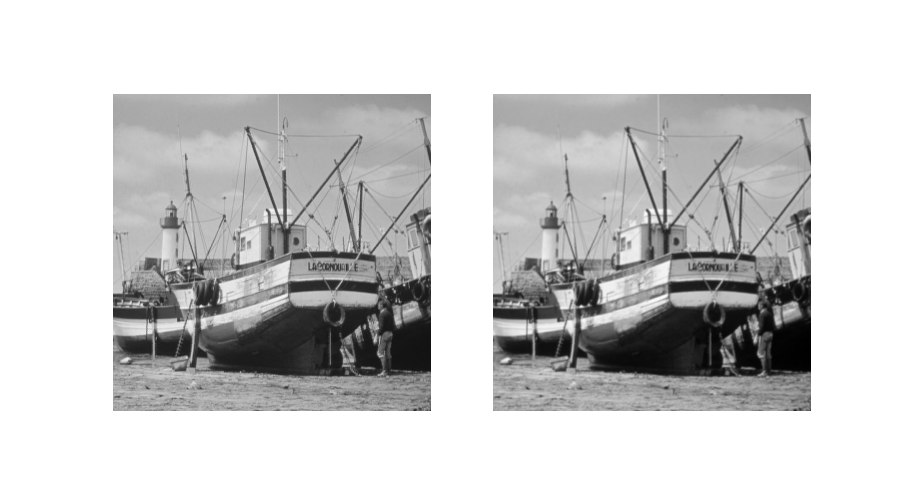

(-0.5, 511.5, 511.5, -0.5)

In [11]:
fig, ((ax1, ax5)) = plt.subplots(1, 2, figsize=(9, 5))
# Plota imagem original
img_ = ax1.imshow(img_gray, cmap='gray')
ax1.axis('off')

# Plota imagem original
img_ = ax5.imshow(img_filt, cmap='gray')
ax5.axis('off')

## Spoilers das próximas aulas

### Filtro passa-baixa

In [12]:
w_low = np.ones([3, 3], dtype=float) / 9
print(w_low)

# Soma de todos os valores na máscara
print(w_low.sum())

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
1.0


In [13]:
img_filt_low = ndi.convolve(img_gray, w_low)

<IPython.core.display.Javascript object>


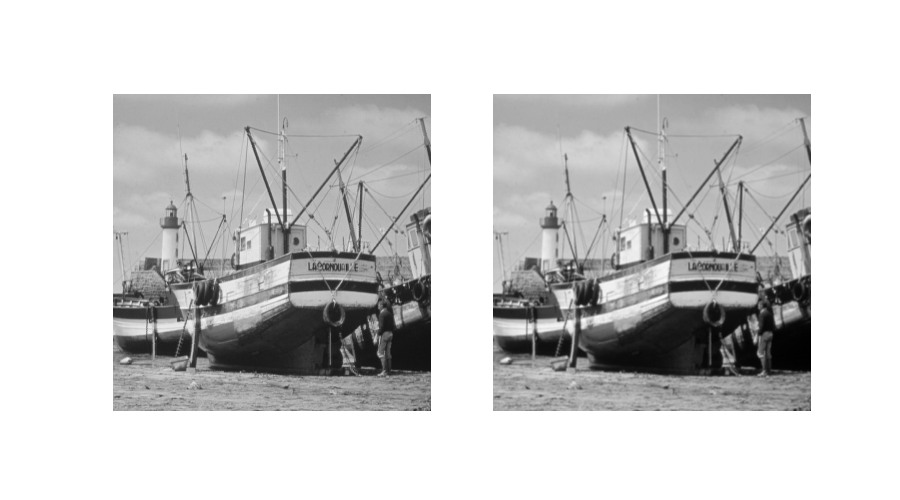

(-0.5, 511.5, 511.5, -0.5)

In [14]:
fig, ((ax1, ax5)) = plt.subplots(1, 2, figsize=(9,5))
# Plota imagem original
img_ = ax1.imshow(img_gray, cmap='gray')
ax1.axis('off')

# Plota imagem original
img_ = ax5.imshow(img_filt_low, cmap='gray')
ax5.axis('off')

### Filtro passa-alta

In [15]:
# w_high = np.array([[0,  1, 0],
#                    [1, -4, 1],
#                    [0,  1, 0]], dtype=float)

w_high = np.array([[1,  1, 1],
                   [1, -8, 1],
                   [1,  1, 1]], dtype=float)

print(w_high)
# Soma de todos os valores na máscara
print(w_high.sum())

[[ 1.  1.  1.]
 [ 1. -8.  1.]
 [ 1.  1.  1.]]
0.0


In [16]:
img_filt_high = ndi.convolve(img_gray, w_high)

print(img_filt_high.shape, img_filt_high.dtype, img_filt_high.min(), img_filt_high.max())

(512, 512) uint8 0 255


<IPython.core.display.Javascript object>


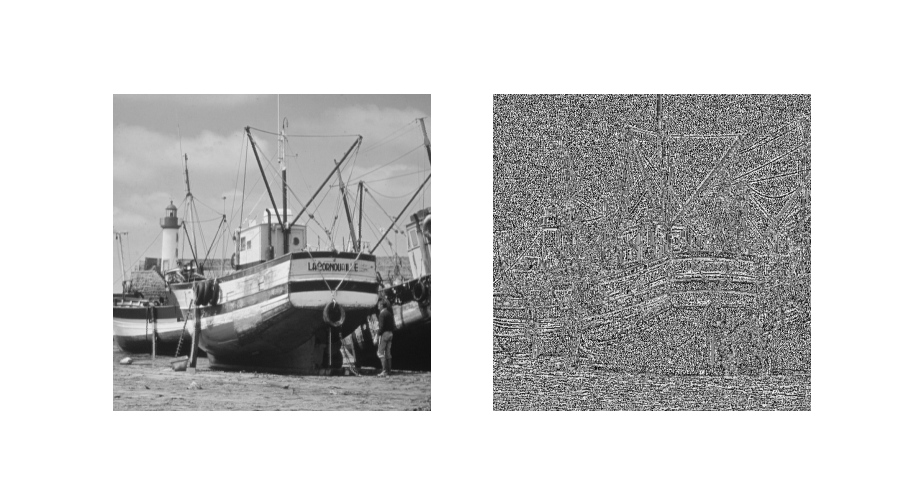

(-0.5, 511.5, 511.5, -0.5)

In [17]:
fig, ((ax1, ax5)) = plt.subplots(1, 2, figsize=(9,5))
# Plota imagem original
img_ = ax1.imshow(img_gray, cmap='gray')
ax1.axis('off')

# Plota imagem original
img_ = ax5.imshow(img_filt_high, cmap='gray')
ax5.axis('off')

### Mais spoilers...

In [18]:
img_filt_low_high = ndi.convolve(img_filt_low, w_high)

print(img_filt_low_high.shape, img_filt_low_high.dtype, img_filt_low_high.min(), img_filt_low_high.max())

(512, 512) uint8 0 255


<IPython.core.display.Javascript object>


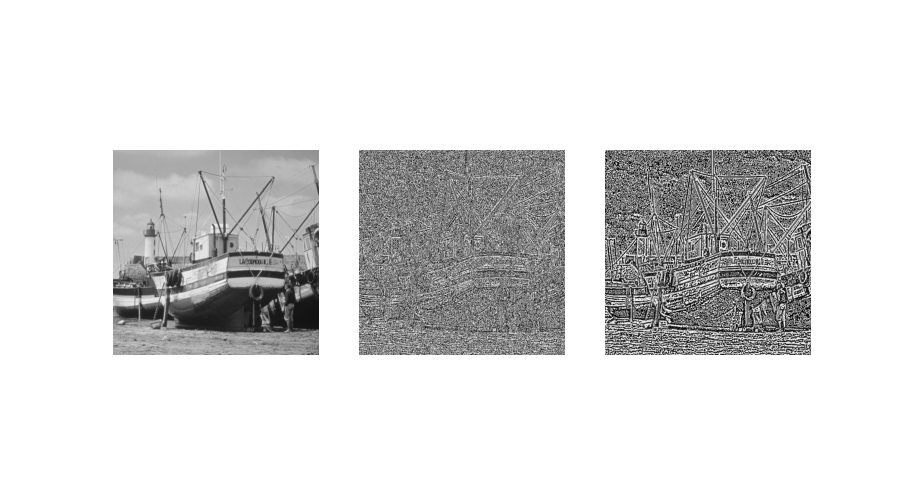

(-0.5, 511.5, 511.5, -0.5)

In [19]:
fig, ((ax1, ax2, ax5)) = plt.subplots(1, 3, figsize=(9,5))

img_ = ax1.imshow(img_gray, cmap='gray')
ax1.axis('off')

img_ = ax2.imshow(img_filt_high, cmap='gray')
ax2.axis('off')

img_ = ax5.imshow(img_filt_low_high, cmap='gray')
ax5.axis('off')

### Dá para melhorar...

In [20]:
w_low_5 = np.ones([5, 5], dtype=float) / (5 * 5)

In [21]:
img_low_high_2 = ndi.convolve(ndi.convolve(img_gray, w_low_5), w_high)

<IPython.core.display.Javascript object>


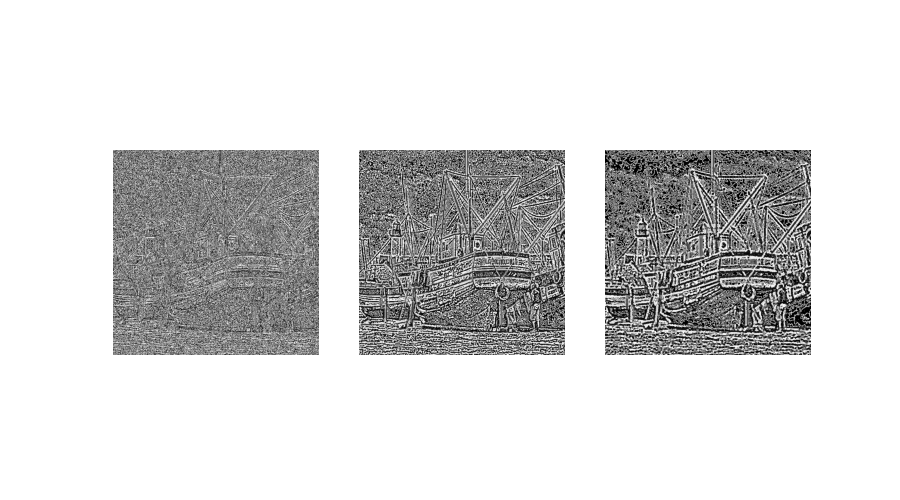

(-0.5, 511.5, 511.5, -0.5)

In [22]:
fig, ((ax1, ax2, ax5)) = plt.subplots(1, 3, figsize=(9,5))

img_ = ax1.imshow(img_filt_high, cmap='gray')
ax1.axis('off')

img_ = ax2.imshow(img_filt_low_high, cmap='gray')
ax2.axis('off')

img_ = ax5.imshow(img_low_high_2, cmap='gray')
ax5.axis('off')

## Bibliografia
---

* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * Disponível para download no site do autor (Exclusivo para uso pessoal)
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

* GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
    
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * Disponível em: http://scipy-lectures.org/

* scikit-image. Documentação.
    * https://scikit-image.org/docs/dev/index.html

* scikit-image. Documentação. Módulo 'filters'.
    * https://scikit-image.org/docs/dev/api/skimage.filters.html
    
* NumPy. Documentação.
    * https://numpy.org/doc/stable/
        
* NumPy. Convolução
    * https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html
            
* Sobre convolução e redes neurais...
    * Amelie Byun et al. CS231n: Convolutional Neural Networks for Visual Recognition. Spring 2020
    * https://cs231n.github.io/convolutional-networks/          